In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('../data/investigation_train_large_checked.csv')

# Get neighborhood columns
neighborhood_cols = [col for col in df.columns if 'wijk_' in col]

# Calculate check rates by neighborhood
neighborhood_rates = pd.DataFrame({
   'neighborhood': neighborhood_cols,
   'check_rate': [df[df[col] == 1]['checked'].mean() * 100 for col in neighborhood_cols],
   'count': [df[col].sum() for col in neighborhood_cols]
}).sort_values('check_rate', ascending=False)

print(neighborhood_rates)

                       neighborhood  check_rate   count
7  adres_recentste_wijk_prins_alexa   18.950265    5087
5        adres_recentste_wijk_noord   16.758141    2733
1   adres_recentste_wijk_delfshaven   16.240618   17721
3  adres_recentste_wijk_ijsselmonde   16.050955    5495
2   adres_recentste_wijk_feijenoord   15.834813   22520
9           adres_unieke_wijk_ratio   14.563416  116312
0     adres_recentste_wijk_charlois   13.519561   13854
6        adres_recentste_wijk_other   13.390084   17386
8  adres_recentste_wijk_stadscentru   12.189349    1690
4  adres_recentste_wijk_kralingen_c   11.610552    5762


Significant variation exists in check rates across neighborhoods, from 19% in Prins Alexander to 12% in Stadscentrum, with most disadvantaged areas showing higher rates of checks.

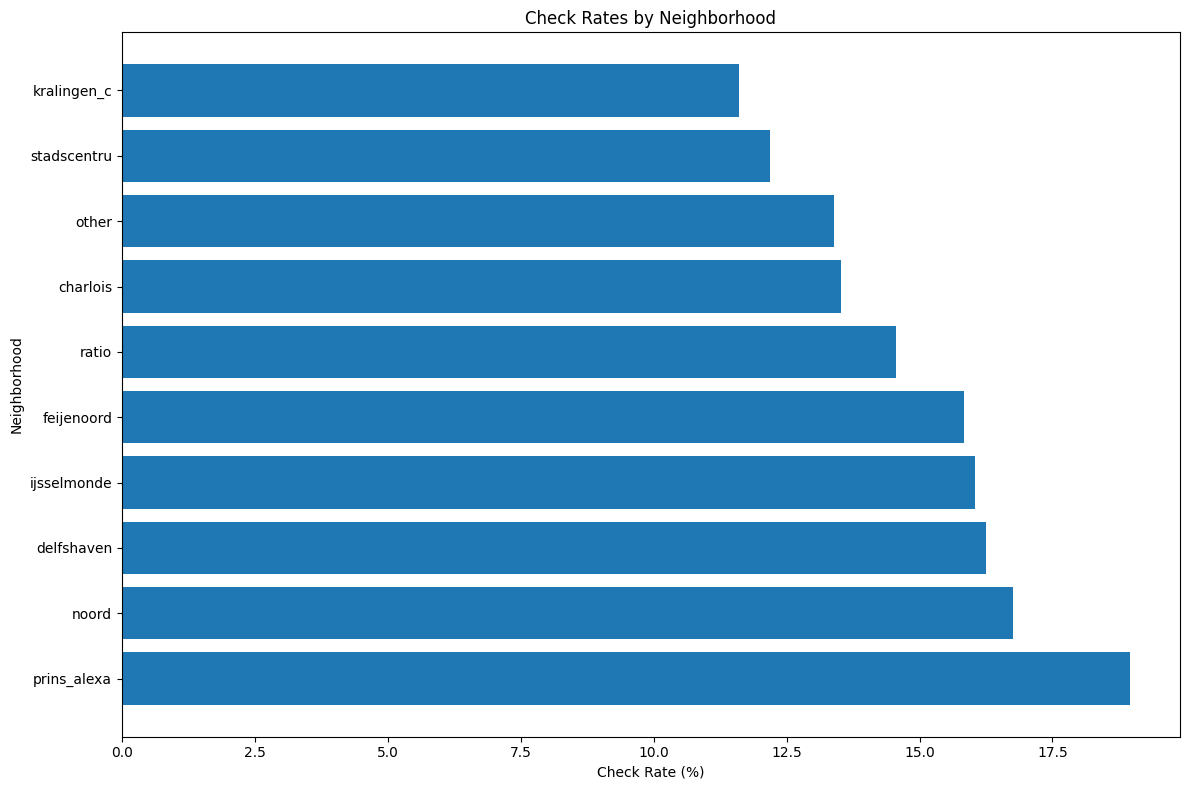

In [3]:
plt.figure(figsize=(12, 8))
plt.barh(neighborhood_rates['neighborhood'].str.replace('adres_recentste_wijk_', '').str.replace('adres_unieke_wijk_', ''),
         neighborhood_rates['check_rate'])
plt.title('Check Rates by Neighborhood')
plt.xlabel('Check Rate (%)')
plt.ylabel('Neighborhood')
plt.tight_layout()